In [75]:
import numpy as np
import scipy.integrate

def RHS(X, t, GATA6, foxa2_trs, foxf1_trs, pFOXA2_params, pFOXF1_params):
    dX = np.zeros(len(X))
    dX[0] = dmrna(X[0], X[4], X[6], X[8], X[10], X[12], foxa2_trs[0], foxa2_trs[1], foxa2_trs[2], foxa2_trs[3], foxa2_trs[4], beta=np.log(2) / 120.)
    dX[1] = dmrna(X[1], X[5], X[7], X[9], X[11], X[13], foxf1_trs[0], foxf1_trs[1], foxf1_trs[2], foxf1_trs[3], foxf1_trs[4], beta=np.log(2) / 120.)
    dX[2] = dPROT(X[2], X[0], a=0.0167, b=np.log(2) / 600.)
    dX[3] = dPROT(X[3], X[1], a=0.0167, b=np.log(2) / 600.)
    dX[4] = dp0(X[4], X[6], X[14], GATA6, X[3], pFOXA2_params[0], pFOXA2_params[1], pFOXA2_params[8], pFOXA2_params[9])
    dX[5] = dp0(X[5], X[7], X[15], GATA6, X[2], pFOXF1_params[0], pFOXF1_params[1], pFOXF1_params[8], pFOXF1_params[9])
    dX[6] = dp1(X[6], X[4], X[8], GATA6, pFOXA2_params[0], pFOXA2_params[1], pFOXA2_params[2], pFOXA2_params[3])
    dX[7] = dp1(X[7], X[5], X[9], GATA6, pFOXF1_params[0], pFOXF1_params[1], pFOXF1_params[2], pFOXF1_params[3])
    dX[8] = dp2(X[8], X[6], X[10], GATA6, X[2], pFOXA2_params[2], pFOXA2_params[3], pFOXA2_params[4], pFOXA2_params[5])
    dX[9] = dp2(X[9], X[7], X[11], GATA6, X[3], pFOXF1_params[2], pFOXF1_params[3], pFOXF1_params[4], pFOXF1_params[5])
    dX[10] = dp3(X[10], X[8], X[12], X[2], pFOXA2_params[4], pFOXA2_params[5], pFOXA2_params[6], pFOXA2_params[7])
    dX[11] = dp3(X[11], X[9], X[13], X[3], pFOXF1_params[4], pFOXF1_params[5], pFOXF1_params[6], pFOXF1_params[7])
    dX[12] = dp4(X[12], X[10], X[2], pFOXA2_params[6], pFOXA2_params[7])
    dX[13] = dp4(X[13], X[11], X[3], pFOXF1_params[6], pFOXF1_params[7])
    dX[14] = dpi(X[14], X[4], X[3], pFOXA2_params[8], pFOXA2_params[9])
    dX[15] = dpi(X[15], X[5], X[2], pFOXF1_params[8], pFOXF1_params[9])
    return dX

def dmrna(mrna, p0, p1, p2, p3, p4, a0, a1, a2, a3, a4, beta):
    return a0 * p0 + a1 * p1 + a2 * p2 + a3 * p3 + a4 * p4 - beta * mrna

def dPROT(PROT, mrna, a, b):
    return a * mrna - b * PROT

def dp0(p0, p1, pinh, PROT, INH, k1f, k1r, kif, kir):
    return k1r * p1 + kir * pinh - k1f * p0 * PROT - kif * p0 * INH

def dp1(p1, p0, p2, PROT, k1f, k1r, k2f, k2r):
    return k1f * p0 * PROT + k2r * p2 - k2f * p1 * PROT - k1r * p1

def dp2(p2, p1, p3, PROT, PROT2, k2f, k2r, k3f, k3r):
    return k2f * p1 * PROT + k3r * p3 - k3f * p2 * PROT2 - k2r * p1 

def dp3(p3, p2, p4, PROT, k3f, k3r, k4f, k4r):
    return k3f * p2 * PROT + k4r * p4 - k4f * p3 * PROT - k3r * p3

def dp4(p4, p3, PROT, k4f, k4r):
    return k4f * p3 * PROT - k4r * p4

def dpi(pi, p0, PROT, kif, kir):
    return kif * p0 * PROT - kir * pi

# 0, 1 = mRNA
# 2, 3 = prot
# 4, 5 = p0
# 6, 7 = p1
# 8, 9 = p2
# 10, 11 = p3
# 12, 13 = p4
# 14, 15 = pinh
X = np.zeros(16)
X[4] = 2
X[5] = 2
foxa2_trs = [5e-8, 0.01, 0.015, 0.05, 0.1] # 5 transcription factor rates
foxf1_trs = [5e-8, 0.01, 0.015, 0.025, 0.05] # 5 transcription factor rates
pFOXA2_params = [0.025, 100, 0.5, 100, 1, 100, 1, 100, 100, 20] # 10 state change params
pFOXF1_params = [0.050, 100, 0.8, 100, 1, 100, 1, 100, 5.0, 1.] # 10 state change params
GATA6 = 3000
t = np.arange(0, 1000, 0.0001)
print(X)
sol = scipy.integrate.odeint(RHS, X, t, args=(GATA6, foxa2_trs, foxf1_trs, pFOXA2_params, pFOXF1_params,))
print(sol[1, :])

[0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[7.61207408e-09 1.53832036e-08 4.22620596e-15 8.51611113e-15
 1.98512691e+00 1.97036075e+00 1.38116866e-02 2.63483735e-02
 9.93773801e-04 3.16408545e-03 7.08637510e-23 4.55972316e-22
 3.23270592e-42 4.19388840e-41 4.21756864e-17 1.04264004e-18]


(0.0, 2.0)

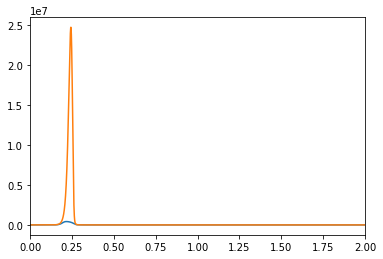

In [77]:
from matplotlib import pyplot as plt

plt.plot(t, sol[:, 4])
plt.plot(t, sol[:, 5])
plt.xlim([0, 2])